In [ ]:
import shutil
import os

# Specify the source and destination paths
source_folder = '/kaggle/input/project2'  # Path to the folder you want to move
destination_folder = '/kaggle/working'  # Destination path where you want to move the folder

# Check if the source folder exists
if os.path.exists(source_folder):
    # Create the destination directory if it does not exist
    os.makedirs(destination_folder, exist_ok=True)

    # Move the folder to the destination
    shutil.move(source_folder, destination_folder)

    print(f"Folder '{os.path.basename(source_folder)}' moved successfully to '{destination_folder}'")
else:
    print(f"Source folder '{source_folder}' not found. Please check the path.")

In [55]:
cd /kaggle/working/project2/bias-bench_latest

/kaggle/working/project2/bias-bench_latest


In [13]:
!python -m pip install -e .

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Obtaining file:///kaggle/working/project2/bias-bench_latest
  Preparing metadata (setup.py) ... done
  Attempting uninstall: module
    Found existing installation: module 0.1.0
    Uninstalling module-0.1.0:
      Successfully uninstalled module-0.1.0
  Running setup.py develop for module


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
import json
import os
from transformers import BertTokenizer, AutoTokenizer
from module.stereoset import StereoSetRunner
from module.model import models
from module.util import generate_experiment_id, _is_generative
# Set the desired parameters
persistent_dir = "/kaggle/working/project2/bias-bench_latest"  # Specify the directory for storing data
model_name_or_path = "bert-base-uncased"  # Choose the HuggingFace model name or path
model_type = "BertForMaskedLM"  # Specify the model type: "BertForMaskedLM" or "GPT2LMHeadModel"
batch_size = 1  # Set the batch size for evaluation
seed = None  # Specify the random seed (optional)
# Generate experiment ID
experiment_id = generate_experiment_id(
    name="stereoset",
    model=model_type,
    model_name_or_path=model_name_or_path,
    seed=seed,
)
print("Running StereoSet:")
print(f" - persistent_dir: {persistent_dir}")
print(f" - model: {model_type}")
print(f" - model_name_or_path: {model_name_or_path}")
print(f" - batch_size: {batch_size}")
print(f" - seed: {seed}")
# Initialize the model and tokenizer
model = getattr(models, model_type)(model_name_or_path)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
# Initialize the StereoSetRunner
input_file = os.path.join(persistent_dir, "data/stereoset/test.json")
runner = StereoSetRunner(
    intrasentence_model=model,
    tokenizer=tokenizer,
    input_file=input_file,
    model_name_or_path=model_name_or_path,
    batch_size=batch_size,
    is_generative=_is_generative(model_type),
)

# Run StereoSet evaluation
results = runner()
# Create directories if they don't exist
results_dir = os.path.join(persistent_dir, "results/stereoset")
os.makedirs(results_dir, exist_ok=True)
# Save results to a JSON file
results_file_path = os.path.join(results_dir, f"{experiment_id}.json")
with open(results_file_path, "w") as f:
    json.dump(results, f, indent=2)

print(f"Evaluation results saved to: {results_file_path}")



Running StereoSet:
 - persistent_dir: /kaggle/working/project2/bias-bench_latest
 - model: BertForMaskedLM
 - model_name_or_path: bert-base-uncased
 - batch_size: 1
 - seed: None


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Evaluating intrasentence task.


100%|██████████| 24464/24464 [04:17<00:00, 95.07it/s]


Evaluation results saved to: /kaggle/working/project2/bias-bench_latest/results/stereoset/stereoset_m-BertForMaskedLM_c-bert-base-uncased.json


Computing projection matrix:
 - persistent_dir: /kaggle/working/project2/bias-bench_latest
 - model: BertModel
 - model_name_or_path: bert-base-uncased
 - bias_type: gender
 - n_classifiers: 80
 - seed: None


Loading INLP data:   6%|▋         | 85884/1372632 [00:14<03:33, 6018.40it/s]


INLP dataset collected:
 - Num. male sentences: 10000
 - Num. female sentences: 10000
 - Num. neutral sentences: 10000


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Encoding neutral sentences: 100%|██████████| 10000/10000 [01:41<00:00, 98.28it/s]


Dataset split sizes:
Train size: 14700; Dev size: 6300; Test size: 9000


iteration: 79, accuracy: 0.3211111111111111: 100%|██████████| 80/80 [26:56<00:00, 20.20s/it] 


unique labels:  [-1, 0, 1]


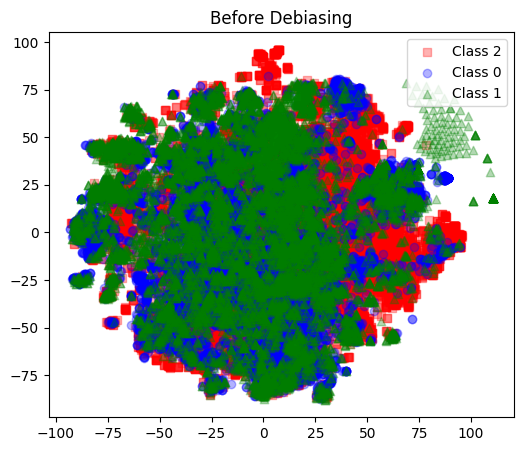

unique labels:  [-1, 0, 1]


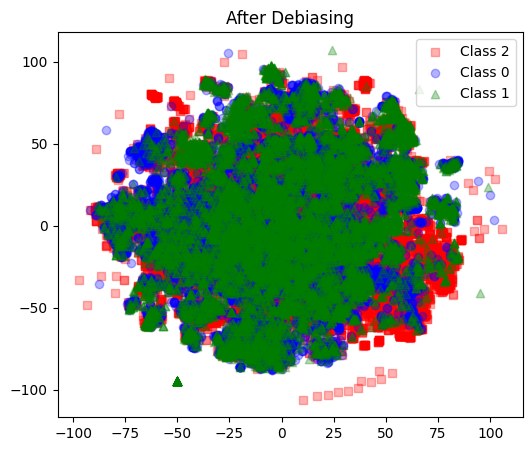

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-before (TSNE space): 0.039070914899380985
V-measure-after (TSNE space): 0.0009954444120017353


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-before (original space): 0.006483683188988214


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-after (original space): 8.531782190760501e-05
Rank before: 768; Rank after: 528
Saving computed projection matrix to: /kaggle/working/project2/bias-bench_latest/results/projection_matrix/projection_m-BertModel_c-bert-base-uncased_t-gender.pt


In [15]:
import os
import torch
import transformers

from module.inlp import load_inlp_data
from module.inlp import compute_projection_matrix
from module.model import models
from module.util import generate_experiment_id

def main():
    # Set the desired parameters directly
    persistent_dir = "/kaggle/working/project2/bias-bench_latest"
    model_name_or_path = "bert-base-uncased"
    model_type = "BertModel"
    bias_type = "gender"
    n_classifiers = 80
    seed = None

    experiment_id = generate_experiment_id(
        name="projection",
        model=model_type,
        model_name_or_path=model_name_or_path,
        bias_type=bias_type,
        seed=seed,
    )

    print("Computing projection matrix:")
    print(f" - persistent_dir: {persistent_dir}")
    print(f" - model: {model_type}")
    print(f" - model_name_or_path: {model_name_or_path}")
    print(f" - bias_type: {bias_type}")
    print(f" - n_classifiers: {n_classifiers}")
    print(f" - seed: {seed}")

    # Load data for INLP classifiers.
    data = load_inlp_data(persistent_dir, bias_type, seed=seed)

    # Load model and tokenizer.
    model = getattr(models, model_type)(model_name_or_path)
    model.eval()
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name_or_path)

    projection_matrix = compute_projection_matrix(
        model,
        tokenizer,
        data,
        bias_type=bias_type,
        n_classifiers=n_classifiers,
    )

    projection_matrix_path = os.path.join(
        persistent_dir, "results/projection_matrix", f"{experiment_id}.pt"
    )
    print(f"Saving computed projection matrix to: {projection_matrix_path}")
    os.makedirs(os.path.dirname(projection_matrix_path), exist_ok=True)
    torch.save(projection_matrix, projection_matrix_path)

if __name__ == "__main__":
    main()


In [19]:
import os
import json 
import torch
from transformers import AutoTokenizer
from module.model import models
from module.stereoset import StereoSetRunner
from module.util import generate_experiment_id, _is_generative, _is_self_debias

# Define paths to required artifacts

projection_matrix_path = "/kaggle/working/project2/bias-bench_latest/results/projection_matrix/projection_m-BertModel_c-bert-base-uncased_t-gender.pt"
persistent_dir = "/kaggle/working/project2/bias-bench_latest"

# Define other arguments
model_name_or_path = "bert-base-uncased"
model_type = "INLPBertForMaskedLM"
bias_type = "gender"
batch_size = 1
seed = None

experiment_id = generate_experiment_id(
    name="stereoset",
    model=model_type,
    model_name_or_path=model_name_or_path,
    bias_type=bias_type,
    seed=seed,
)
kwargs = {}

if projection_matrix_path is not None:
    projection_matrix = torch.load(projection_matrix_path)
    kwargs["projection_matrix"] = projection_matrix

model = getattr(models, model_type)(model_name_or_path, **kwargs)

if _is_self_debias(model_type):
    model._model.eval()
else:
    model.eval()

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

# Use self-debiasing name.
if bias_type == "race":
    bias_type = "race-color"

runner = StereoSetRunner(
    intrasentence_model=model,
    tokenizer=tokenizer,
    input_file=f"{persistent_dir}/data/stereoset/test.json",
    model_name_or_path=model_name_or_path,
    batch_size=batch_size,
    is_generative=_is_generative(model_type),
    is_self_debias=_is_self_debias(model_type),
    bias_type=bias_type,
)
results = runner()

os.makedirs(f"{persistent_dir}/results/stereoset", exist_ok=True)
with open(
        f"{persistent_dir}/results/stereoset/{experiment_id}.json", "w"
    ) as f:
        json.dump(results, f, indent=2)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Evaluating intrasentence task.


2024-04-16 08:08:51.554608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 08:08:51.554702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 08:08:51.686856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
100%|██████████| 24464/24464 [04:44<00:00, 86.08it/s]


Computing projection matrix:
 - persistent_dir: /kaggle/working/project2/bias-bench_latest
 - model: BertModel
 - model_name_or_path: bert-base-uncased
 - bias_type: race
 - n_classifiers: 80
 - seed: None


Loading INLP data:  21%|██        | 283719/1372632 [00:38<02:28, 7324.23it/s]


INLP dataset collected:
 - Num. bias sentences: 10000
 - Num. neutral sentences: 10000


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Encoding neutral sentences: 100%|██████████| 10000/10000 [01:36<00:00, 103.46it/s]


Dataset split sizes:
Train size: 9800; Dev size: 4200; Test size: 6000


iteration: 79, accuracy: 0.5123809523809524: 100%|██████████| 80/80 [07:46<00:00,  5.83s/it]


unique labels:  [0, 1]


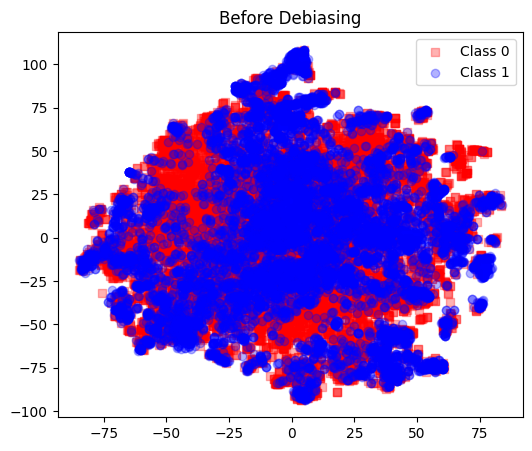

unique labels:  [0, 1]


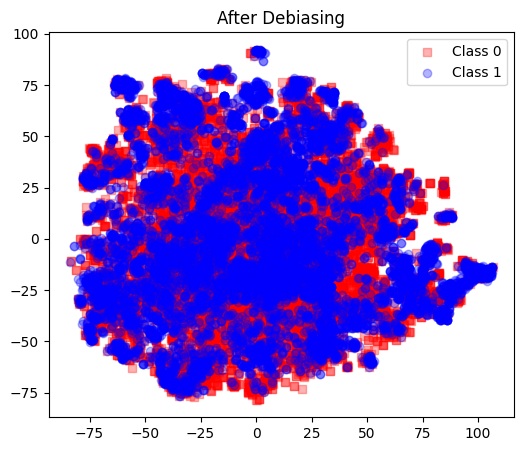

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-before (TSNE space): 0.0005818914607399956
V-measure-after (TSNE space): 0.00026210888920589906


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-before (original space): 0.08225604871661152


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-after (original space): 0.007291545627515921
Rank before: 768; Rank after: 688
Saving computed projection matrix to: /kaggle/working/project2/bias-bench_latest/results/projection_matrix/projection_m-BertModel_c-bert-base-uncased_t-race.pt


In [33]:
import os
import torch
import transformers

from module.inlp import load_inlp_data
from module.inlp import compute_projection_matrix
from module.model import models
from module.util import generate_experiment_id

def main():
    # Set the desired parameters directly
    persistent_dir = "/kaggle/working/project2/bias-bench_latest"
    model_name_or_path = "bert-base-uncased"
    model_type = "BertModel"
    bias_type = "race"
    n_classifiers = 80
    seed = None

    experiment_id = generate_experiment_id(
        name="projection",
        model=model_type,
        model_name_or_path=model_name_or_path,
        bias_type=bias_type,
        seed=seed,
    )

    print("Computing projection matrix:")
    print(f" - persistent_dir: {persistent_dir}")
    print(f" - model: {model_type}")
    print(f" - model_name_or_path: {model_name_or_path}")
    print(f" - bias_type: {bias_type}")
    print(f" - n_classifiers: {n_classifiers}")
    print(f" - seed: {seed}")

    # Load data for INLP classifiers.
    data = load_inlp_data(persistent_dir, bias_type, seed=seed)

    # Load model and tokenizer.
    model = getattr(models, model_type)(model_name_or_path)
    model.eval()
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name_or_path)

    projection_matrix = compute_projection_matrix(
        model,
        tokenizer,
        data,
        bias_type=bias_type,
        n_classifiers=n_classifiers,
    )

    projection_matrix_path = os.path.join(
        persistent_dir, "results/projection_matrix", f"{experiment_id}.pt"
    )
    print(f"Saving computed projection matrix to: {projection_matrix_path}")
    os.makedirs(os.path.dirname(projection_matrix_path), exist_ok=True)
    torch.save(projection_matrix, projection_matrix_path)

if __name__ == "__main__":
    main()


In [30]:
import os
import json 
import torch
from transformers import AutoTokenizer
from module.model import models
from module.stereoset import StereoSetRunner
from module.util import generate_experiment_id, _is_generative, _is_self_debias

# Define paths to required artifacts

projection_matrix_path = "/kaggle/working/project2/bias-bench_latest/results/projection_matrix/projection_m-BertModel_c-bert-base-uncased_t-gender.pt"
persistent_dir = "/kaggle/working/project2/bias-bench_latest"

# Define other arguments
model_name_or_path = "bert-base-uncased"
model_type = "INLPBertForMaskedLM"
bias_type = "race"
batch_size = 1
seed = None

experiment_id = generate_experiment_id(
    name="stereoset",
    model=model_type,
    model_name_or_path=model_name_or_path,
    bias_type=bias_type,
    seed=seed,
)
kwargs = {}

if projection_matrix_path is not None:
    projection_matrix = torch.load(projection_matrix_path)
    kwargs["projection_matrix"] = projection_matrix

model = getattr(models, model_type)(model_name_or_path, **kwargs)

if _is_self_debias(model_type):
    model._model.eval()
else:
    model.eval()

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

# Use self-debiasing name.
if bias_type == "race":
    bias_type = "race-color"

runner = StereoSetRunner(
    intrasentence_model=model,
    tokenizer=tokenizer,
    input_file=f"{persistent_dir}/data/stereoset/test.json",
    model_name_or_path=model_name_or_path,
    batch_size=batch_size,
    is_generative=_is_generative(model_type),
    is_self_debias=_is_self_debias(model_type),
    bias_type=bias_type,
)
results = runner()

os.makedirs(f"{persistent_dir}/results/stereoset", exist_ok=True)
with open(
        f"{persistent_dir}/results/stereoset/{experiment_id}.json", "w"
    ) as f:
        json.dump(results, f, indent=2)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Evaluating intrasentence task.


100%|██████████| 24464/24464 [04:50<00:00, 84.11it/s]


In [32]:
import os
import json 

In [69]:
os.makedirs(f"{persistent_dir}/results/stereoset", exist_ok=True)
with open(
        f"{persistent_dir}/results/stereoset/{experiment_id}.json", "w"
    ) as f:
        json.dump(results, f, indent=2)

In [34]:
import os
import json 
import torch
from transformers import AutoTokenizer
from module.model import models
from module.stereoset import StereoSetRunner
from module.util import generate_experiment_id, _is_generative, _is_self_debias

# Define paths to required artifacts

projection_matrix_path = "/kaggle/working/project2/bias-bench_latest/results/projection_matrix/projection_m-BertModel_c-bert-base-uncased_t-gender.pt"
persistent_dir = "/kaggle/working/project2/bias-bench_latest"

# Define other arguments
model_name_or_path = "bert-base-uncased"
model_type = "INLPBertForMaskedLM"
bias_type = "religion"
batch_size = 1
seed = None

experiment_id = generate_experiment_id(
    name="stereoset",
    model=model_type,
    model_name_or_path=model_name_or_path,
    bias_type=bias_type,
    seed=seed,
)
kwargs = {}

if projection_matrix_path is not None:
    projection_matrix = torch.load(projection_matrix_path)
    kwargs["projection_matrix"] = projection_matrix

model = getattr(models, model_type)(model_name_or_path, **kwargs)

if _is_self_debias(model_type):
    model._model.eval()
else:
    model.eval()

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

# Use self-debiasing name.
if bias_type == "race":
    bias_type = "race-color"

runner = StereoSetRunner(
    intrasentence_model=model,
    tokenizer=tokenizer,
    input_file=f"{persistent_dir}/data/stereoset/test.json",
    model_name_or_path=model_name_or_path,
    batch_size=batch_size,
    is_generative=_is_generative(model_type),
    is_self_debias=_is_self_debias(model_type),
    bias_type=bias_type,
)
results = runner()

os.makedirs(f"{persistent_dir}/results/stereoset", exist_ok=True)
with open(
        f"{persistent_dir}/results/stereoset/{experiment_id}.json", "w"
    ) as f:
        json.dump(results, f, indent=2)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Evaluating intrasentence task.


100%|██████████| 24464/24464 [04:46<00:00, 85.35it/s]


Computing projection matrix:
 - persistent_dir: /kaggle/working/project2/bias-bench_latest
 - model: BertModel
 - model_name_or_path: bert-base-uncased
 - bias_type: religion
 - n_classifiers: 100
 - seed: None


Loading INLP data:  20%|█▉        | 267685/1372632 [00:36<02:31, 7316.31it/s]


INLP dataset collected:
 - Num. bias sentences: 10000
 - Num. neutral sentences: 10000


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Encoding neutral sentences: 100%|██████████| 10000/10000 [01:35<00:00, 105.05it/s]


Dataset split sizes:
Train size: 9800; Dev size: 4200; Test size: 6000


iteration: 99, accuracy: 0.5107142857142857: 100%|██████████| 100/100 [09:13<00:00,  5.54s/it]


unique labels:  [0, 1]


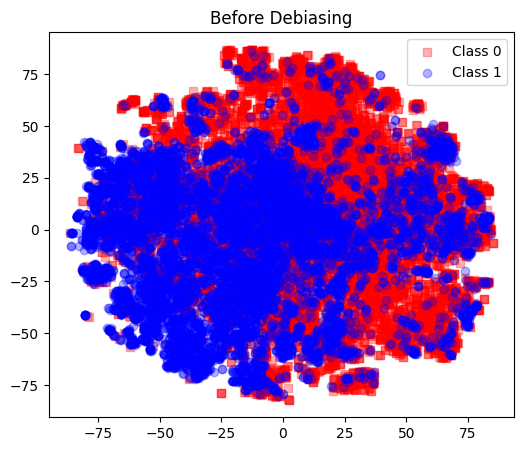

unique labels:  [0, 1]


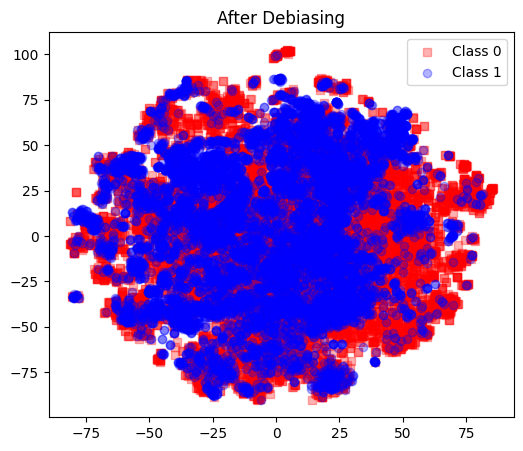

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-before (TSNE space): 0.11793087126978265
V-measure-after (TSNE space): 0.006747212792603958


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-before (original space): 0.05917316896733831


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-measure-after (original space): 0.0003207141611765237
Rank before: 768; Rank after: 668
Saving computed projection matrix to: /kaggle/working/project2/bias-bench_latest/results/projection_matrix/projection_m-BertModel_c-bert-base-uncased_t-religion.pt


In [56]:
import os
import torch
import transformers

from module.inlp import load_inlp_data
from module.inlp import compute_projection_matrix
from module.model import models
from module.util import generate_experiment_id

def main():
    # Set the desired parameters directly
    persistent_dir = "/kaggle/working/project2/bias-bench_latest"
    model_name_or_path = "bert-base-uncased"
    model_type = "BertModel"
    bias_type = "religion"
    n_classifiers = 100
    seed = None

    experiment_id = generate_experiment_id(
        name="projection",
        model=model_type,
        model_name_or_path=model_name_or_path,
        bias_type=bias_type,
        seed=seed,
    )

    print("Computing projection matrix:")
    print(f" - persistent_dir: {persistent_dir}")
    print(f" - model: {model_type}")
    print(f" - model_name_or_path: {model_name_or_path}")
    print(f" - bias_type: {bias_type}")
    print(f" - n_classifiers: {n_classifiers}")
    print(f" - seed: {seed}")

    # Load data for INLP classifiers.
    data = load_inlp_data(persistent_dir, bias_type, seed=seed)

    # Load model and tokenizer.
    model = getattr(models, model_type)(model_name_or_path)
    model.eval()
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name_or_path)

    projection_matrix = compute_projection_matrix(
        model,
        tokenizer,
        data,
        bias_type=bias_type,
        n_classifiers=n_classifiers,
    )

    projection_matrix_path = os.path.join(
        persistent_dir, "results/projection_matrix", f"{experiment_id}.pt"
    )
    print(f"Saving computed projection matrix to: {projection_matrix_path}")
    os.makedirs(os.path.dirname(projection_matrix_path), exist_ok=True)
    torch.save(projection_matrix, projection_matrix_path)

if __name__ == "__main__":
    main()


In [57]:
import os
import json 
import torch
from transformers import AutoTokenizer
from module.model import models
from module.stereoset import StereoSetRunner
from module.util import generate_experiment_id, _is_generative, _is_self_debias

# Define paths to required artifacts

projection_matrix_path = "/kaggle/working/project2/bias-bench_latest/results/projection_matrix/projection_m-BertModel_c-bert-base-uncased_t-gender.pt"
persistent_dir = "/kaggle/working/project2/bias-bench_latest"

# Define other arguments
model_name_or_path = "bert-base-uncased"
model_type = "INLPBertForMaskedLM"
bias_type = "religion"
batch_size = 1
seed = None

experiment_id = generate_experiment_id(
    name="stereoset",
    model=model_type,
    model_name_or_path=model_name_or_path,
    bias_type=bias_type,
    seed=seed,
)
kwargs = {}

if projection_matrix_path is not None:
    projection_matrix = torch.load(projection_matrix_path)
    kwargs["projection_matrix"] = projection_matrix

model = getattr(models, model_type)(model_name_or_path, **kwargs)

if _is_self_debias(model_type):
    model._model.eval()
else:
    model.eval()

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

# Use self-debiasing name.
if bias_type == "race":
    bias_type = "race-color"

runner = StereoSetRunner(
    intrasentence_model=model,
    tokenizer=tokenizer,
    input_file=f"{persistent_dir}/data/stereoset/test.json",
    model_name_or_path=model_name_or_path,
    batch_size=batch_size,
    is_generative=_is_generative(model_type),
    is_self_debias=_is_self_debias(model_type),
    bias_type=bias_type,
)
results = runner()

os.makedirs(f"{persistent_dir}/results/stereoset", exist_ok=True)
with open(
        f"{persistent_dir}/results/stereoset/{experiment_id}.json", "w"
    ) as f:
        json.dump(results, f, indent=2)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Evaluating intrasentence task.


100%|██████████| 24464/24464 [04:45<00:00, 85.61it/s]


In [3]:
!python stereoset_evaluation.py --persistent_dir /kaggle/working/project2/bias-bench_latest --predictions_file stereoset_m-BertForMaskedLM_c-bert-base-uncased.json  --predictions_dir /kaggle/working/project2/bias-bench_latest/results/stereoset --output_file bias_output.txt

Evaluating StereoSet files:
 - predictions_file: stereoset_m-BertForMaskedLM_c-bert-base-uncased.json
 - predictions_dir: /kaggle/working/project2/bias-bench_latest/results/stereoset
 - output_file: bias_output.txt

Evaluating /kaggle/working/project2/bias-bench_latest/results/stereoset/stereoset_m-INLPBertForMaskedLM_c-bert-base-uncased_t-gender.json...
intrasentence
	gender
		Count: 2313.0
		LM Score: 82.89677535201024
		SS Score: 55.36113990401846
		ICAT Score: 74.00835114692792
	profession
		Count: 7194.0
		LM Score: 80.48410893132176
		SS Score: 55.62910921306347
		ICAT Score: 71.42303214951161
	race
		Count: 8928.0
		LM Score: 81.52724225139174
		SS Score: 59.12244474458079
		ICAT Score: 66.65268699906427
	religion
		Count: 741.0
		LM Score: 80.98628461995166
		SS Score: 60.262755504382
		ICAT Score: 64.36343585469454
	overall
		Count: 6392.0
		LM Score: 81.28895867919874
		SS Score: 57.39940116517906
		ICAT Score: 69.25916636785763
overall
	Count: 6392.0
	LM Score: 81.2889586791